In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

mega_csv = pd.read_csv("../output_files/MegaDf.csv")

In [35]:
mega_csv

,Unnamed: 0,cityid,Health score,City Name,stateabbrev,lat,lon,city_pop2019_y,merchants_all,new_case_rate,...,Office and administrative support occupations_RANK,Personal care and service occupations_RANK,Production occupations_RANK,Protective service occupations_RANK,Sales and related occupations_RANK,Transportation and material moving occupations_RANK,new_case_rate_RANK,overall_SCORE,overall_SCORE_RANK,overall_RANK
0,0,1,4.233333,Los Angeles,CA,34.05,-118.24,10039107,-33.30%,18.60,...,8.0,10.0,32.0,8.0,20.0,17.0,29.0,111.5,18.583333,10.0
1,1,2,3.784211,New York City,NY,40.71,-74.01,8336817,-42.00%,49.30,...,6.0,8.0,21.0,9.0,4.0,3.0,51.0,113.0,18.833333,12.0
2,2,3,4.077778,Chicago,IL,41.88,-87.63,5150233,-39.60%,11.00,...,11.0,20.0,24.0,11.0,16.0,49.0,12.5,92.5,15.416667,3.0
3,3,4,4.009091,Houston,TX,29.76,-95.37,4713325,-56.70%,14.50,...,24.0,42.0,7.0,38.5,25.0,47.0,22.0,102.0,17.000000,4.0
4,4,5,4.030769,Phoenix,AZ,33.45,-112.07,4485414,-29.30%,22.10,...,32.0,53.0,33.0,22.0,33.0,9.0,39.5,157.5,26.250000,29.0
5,5,6,3.953846,San Diego,CA,32.72,-117.16,3338330,-36.10%,21.80,...,16.0,9.0,16.5,10.0,29.5,19.0,35.0,144.0,24.000000,21.0
6,6,7,3.375000,Dallas,TX,32.78,-96.80,2635516,-52.50%,13.70,...,29.0,39.5,40.5,25.5,22.5,5.5,19.0,135.0,22.500000,15.5
7,7,8,2.600000,Las Vegas,NV,36.17,-115.14,2266715,-28.40%,12.10,...,45.0,43.0,39.0,23.5,45.0,53.0,15.5,198.5,33.083333,39.0
8,8,9,3.468750,Seattle,WA,47.61,-122.33,2252782,-25.90%,9.70,...,7.0,2.0,1.0,6.0,7.0,1.0,10.0,131.5,21.916667,13.0
9,9,10,4.100000,Fort Worth,TX,32.76,-97.33,2102515,-52.40%,19.40,...,29.0,39.5,40.5,25.5,22.5,5.5,31.5,134.5,22.416667,14.0


In [36]:
clean_data= mega_csv.drop(columns=["Unnamed: 0"])
clean_data.set_index("cityid")

,Health score,City Name,stateabbrev,lat,lon,city_pop2019_y,merchants_all,new_case_rate,bg_posts,Average Cost of Living,...,Office and administrative support occupations_RANK,Personal care and service occupations_RANK,Production occupations_RANK,Protective service occupations_RANK,Sales and related occupations_RANK,Transportation and material moving occupations_RANK,new_case_rate_RANK,overall_SCORE,overall_SCORE_RANK,overall_RANK
cityid,,,,,,,,,,,,,,,,,,,,,
1,4.233333,Los Angeles,CA,34.05,-118.24,10039107,-33.30%,18.60,0.05670,3440.32,...,8.0,10.0,32.0,8.0,20.0,17.0,29.0,111.5,18.583333,10.0
2,3.784211,New York City,NY,40.71,-74.01,8336817,-42.00%,49.30,0.15300,4916.34,...,6.0,8.0,21.0,9.0,4.0,3.0,51.0,113.0,18.833333,12.0
3,4.077778,Chicago,IL,41.88,-87.63,5150233,-39.60%,11.00,0.06270,2905.82,...,11.0,20.0,24.0,11.0,16.0,49.0,12.5,92.5,15.416667,3.0
4,4.009091,Houston,TX,29.76,-95.37,4713325,-56.70%,14.50,0.06590,2096.92,...,24.0,42.0,7.0,38.5,25.0,47.0,22.0,102.0,17.000000,4.0
5,4.030769,Phoenix,AZ,33.45,-112.07,4485414,-29.30%,22.10,0.06770,1842.05,...,32.0,53.0,33.0,22.0,33.0,9.0,39.5,157.5,26.250000,29.0
6,3.953846,San Diego,CA,32.72,-117.16,3338330,-36.10%,21.80,0.00768,3097.96,...,16.0,9.0,16.5,10.0,29.5,19.0,35.0,144.0,24.000000,21.0
7,3.375000,Dallas,TX,32.78,-96.80,2635516,-52.50%,13.70,0.01900,2445.32,...,29.0,39.5,40.5,25.5,22.5,5.5,19.0,135.0,22.500000,15.5
8,2.600000,Las Vegas,NV,36.17,-115.14,2266715,-28.40%,12.10,0.01050,1778.28,...,45.0,43.0,39.0,23.5,45.0,53.0,15.5,198.5,33.083333,39.0
9,3.468750,Seattle,WA,47.61,-122.33,2252782,-25.90%,9.70,0.13600,3233.79,...,7.0,2.0,1.0,6.0,7.0,1.0,10.0,131.5,21.916667,13.0


In [37]:
clean_data.columns

Index(['cityid', 'Health score', 'City Name', 'stateabbrev', 'lat', 'lon',
       'city_pop2019_y', 'merchants_all', 'new_case_rate', 'bg_posts',
       'Average Cost of Living ', 'Architecture and engineering occupations',
       'Arts, design, entertainment, sports, and media occupations',
       'Building and grounds cleaning and maintenance occupations',
       'Business and financial operations occupations',
       'Community and social service occupations',
       'Computer and mathematical occupations',
       'Construction and extraction occupations',
       'Educational instruction and library occupations',
       'Food preparation and serving related occupations',
       'Healthcare practitioners and technical occupations',
       'Healthcare support occupations',
       'Installation, maintenance, and repair occupations',
       'Legal occupations', 'Life, physical, and social science occupations',
       'Management occupations',
       'Office and administrative support oc

In [38]:
'''def Weather_Scatter(x_val,y_val):
    colx = x_val
    coly = y_val

    # set up x, y and title for plot
    x=clean_city_data[colx]
    y=clean_city_data[coly]
    plot_title = colname_dic[colx] +" vs. " + colname_dic[coly]

    #plot setup
    plt.scatter(x,y)
    plt.xlabel(colname_dic[colx])
    plt.ylabel(colname_dic[coly])
    plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))'''

'def Weather_Scatter(x_val,y_val):\n    colx = x_val\n    coly = y_val\n\n    # set up x, y and title for plot\n    x=clean_city_data[colx]\n    y=clean_city_data[coly]\n    plot_title = colname_dic[colx] +" vs. " + colname_dic[coly]\n\n    #plot setup\n    plt.scatter(x,y)\n    plt.xlabel(colname_dic[colx])\n    plt.ylabel(colname_dic[coly])\n    plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))'

In [152]:
def scatter_plot(x_val,y_val):
    x=clean_data[x_val]
    y=clean_data[y_val]
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
    mc_fit = slope * x + intercept
    plt.figure(figsize=(15,5))
    plt.scatter(x,y)
    plt.plot(x,mc_fit,"r-")
    plt.xticks(rotation =90)
    print(f"r-value is:{rvalue**2}")
    plt.show()
    #plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))


r-value is:nan


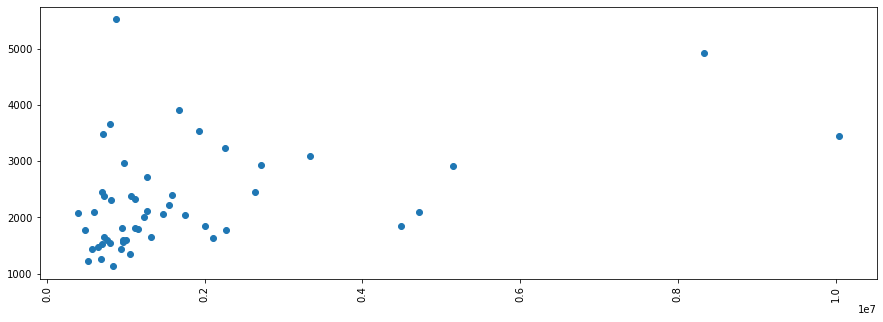

In [153]:
scatter_plot("city_pop2019_y","Average Cost of Living ")

r-value is:nan


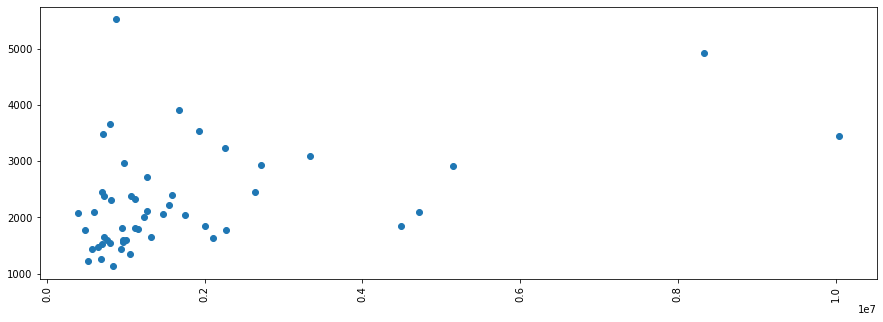

In [151]:
x=clean_data["city_pop2019_y"]
y=clean_data["Average Cost of Living "]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
mc_fit = slope * x + intercept
plt.figure(figsize=(15,5))
plt.scatter(x,y)
plt.plot(x,mc_fit,"r-")
plt.xticks(rotation =90)
print(f"r-value is:{rvalue**2}")
plt.show()


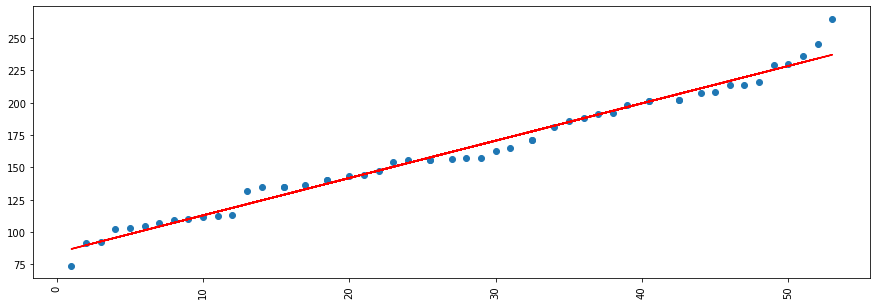

In [134]:
correlation = st.pearsonr(clean_data["overall_RANK"], clean_data["overall_SCORE"])
x_value = clean_data["overall_RANK"]
y_value = clean_data["overall_SCORE"].astype(float)
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_value,y_value)
mc_fit = slope * x_value + intercept
plt.figure(figsize= (15,5))
plt.scatter(x_value,y_value)
plt.plot(x_value,mc_fit,"r-")
plt.xticks(rotation=90)

plt.show()

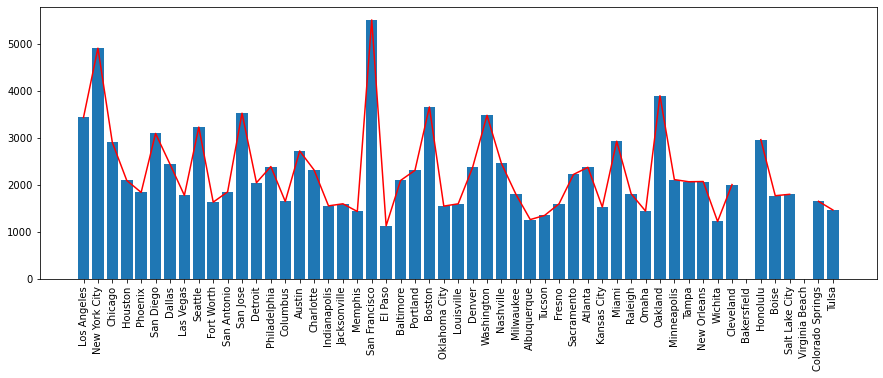

In [41]:
x_value = clean_data["City Name"]
y_value = clean_data["Average Cost of Living "].astype(float)
plt.figure(figsize= (15,5))
plt.bar(x_value,y_value)
plt.plot(x_value,y_value,color="r")
plt.xticks(rotation =90)
plt.show()

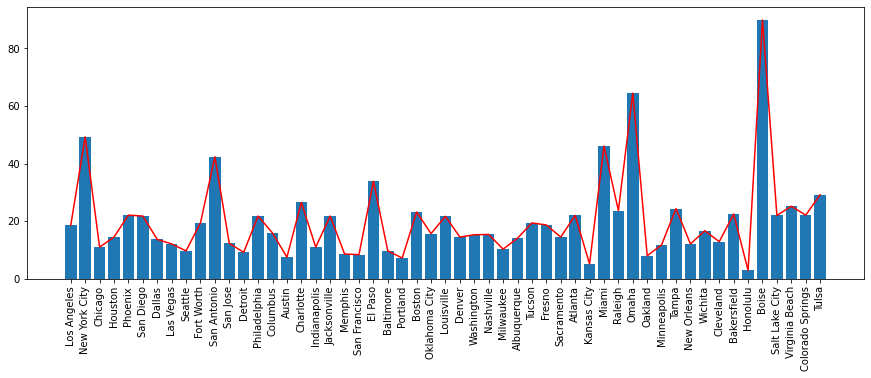

In [70]:
x_value = clean_data["City Name"]
y_value = clean_data["new_case_rate"]
plt.figure(figsize= (15,5))
plt.bar(x_value,y_value)
plt.plot(x_value,y_value,color="r")
plt.xticks(rotation =90)
plt.show()


In [51]:
quartiles = clean_data["city_pop2019_y"].quantile([.25,.5,.75])
# Lower Quartile
lower_q = quartiles[.25]
 # Upper Quartile
upper_q = quartiles[.75]
print(f"The Lower quartiles is: {round(lower_q,2)}\n")
print(f"The Upper quartiles is: {round(upper_q,2)}\n")
    
# Interquartile Range 
iqr = upper_q - lower_q
print(f"The interquartile range is: {round(iqr,2)}\n")
    
# Lower Bound Value
lower_bound = lower_q - (1.5 * iqr)
# Upper Bound Value
upper_bound = upper_q + (1.5 * iqr)
print(f"The Lower Bound is: {round(lower_bound,2)}\n")
print(f"The Upper Bound is: {round(upper_bound,2)}\n")
    
# Ge the Outliners Value
outliners = clean_data.loc[(clean_data["city_pop2019_y"]<lower_bound) | (clean_data["city_pop2019_y"]>upper_bound)]
print(f"Potential Outliners: {outliners}")
print("----------------------------------------------------------------------------------")   

The Lower quartiles is: 766757.0

The Upper quartiles is: 1749343.0

The interquartile range is: 982586.0

The Lower Bound is: -707122.0

The Upper Bound is: 3223222.0

Potential Outliners:    cityid  Health score      City Name stateabbrev    lat     lon  \
0       1      4.233333    Los Angeles          CA  34.05 -118.24   
1       2      3.784211  New York City          NY  40.71  -74.01   
2       3      4.077778        Chicago          IL  41.88  -87.63   
3       4      4.009091        Houston          TX  29.76  -95.37   
4       5      4.030769        Phoenix          AZ  33.45 -112.07   
5       6      3.953846      San Diego          CA  32.72 -117.16   

   city_pop2019_y merchants_all  new_case_rate  bg_posts  ...  \
0        10039107       -33.30%           18.6   0.05670  ...   
1         8336817       -42.00%           49.3   0.15300  ...   
2         5150233       -39.60%           11.0   0.06270  ...   
3         4713325       -56.70%           14.5   0.06590  ...   
4

In [59]:
clean_data["city_pop2019_y"]

0     10039107
1      8336817
2      5150233
3      4713325
4      4485414
5      3338330
6      2635516
7      2266715
8      2252782
9      2102515
10     2003554
11     1927852
12     1749343
13     1584064
14     1316756
15     1273954
16     1110356
17      964582
18      957755
19      937166
20      881549
21      839238
22      593490
23      812855
24      803907
25      797434
26      766757
27      727211
28      705749
29      694144
30      945726
31      679121
32     1047279
33      999101
34     1552058
35     1063937
36      703011
37     2716940
38     1111761
39      571327
40     1671329
41     1265843
42     1471968
43      390144
44      516042
45     1235072
46      900202
47      974563
48      481587
49     1160437
50      449974
51      720403
52      651552
Name: city_pop2019_y, dtype: int64

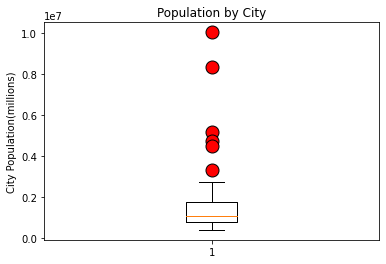

In [69]:
#city = ["Los Angeles","New York City","Chicago","Houston","Phoenix","San Diego"]
fig1, ax1 =plt.subplots()

#Give the outliner customize formatting
outliner = dict(markerfacecolor="r",markersize=13)

# Get the boxplot thorugh subplots
ax1.boxplot(clean_data["city_pop2019_y"],flierprops=outliner)

# Formatting the plot with title and labels
ax1.set_title("Population by City")

plt.ylabel("City Population(millions)")


#Display the Box Plot
plt.show()

In [156]:
clean_data.dtypes

cityid                                                   int64
Health score                                           float64
City Name                                               object
stateabbrev                                             object
lat                                                    float64
                                                        ...   
Transportation and material moving occupations_RANK    float64
new_case_rate_RANK                                     float64
overall_SCORE                                          float64
overall_SCORE_RANK                                     float64
overall_RANK                                           float64
Length: 62, dtype: object